<a href="https://colab.research.google.com/github/MateoVB/AIT-Deep-Learning/blob/main/Class_Collab_AIT_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIT 2024 spring semester
Hey class!

# 2024.02.29


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Preprocess the data
#train_images = train_images / 255.0
#test_images = test_images / 255.0

# split the data into training, validation and test sets
valid_split=0.2
v_split = int(len(train_images)*(1-valid_split))
X_train = train_images[0:v_split]
Y_train = train_labels[0:v_split]
X_valid = train_images[v_split:]
Y_valid = train_labels[v_split:]
X_test  = test_images
Y_test  = test_labels



In [ ]:
len(X_train),len(X_valid), len(X_test)

(48000, 12000, 10000)

In [ ]:
np.unique(Y_valid)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
for i in np.unique(Y_train):
  print(len(Y_train[Y_train==i]))

4764
4794
4768
4796
4785
4806
4851
4820
4820
4796


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train.reshape(-1,28*28))
X_train = scaler.transform(X_train.reshape(-1,28*28))
X_valid = scaler.transform(X_valid.reshape(-1,28*28))
X_test  = scaler.transform(X_test.reshape(-1,28*28))

In [ ]:
print(np.mean(X_train), np.std(X_train))
print(np.mean(X_valid), np.std(X_valid))
print(np.mean(X_test), np.std(X_test))

2.616199018572478e-18 0.9999999999999994
0.008216844216818217 0.9963913176884609
0.004140728103948485 1.0066803662505592


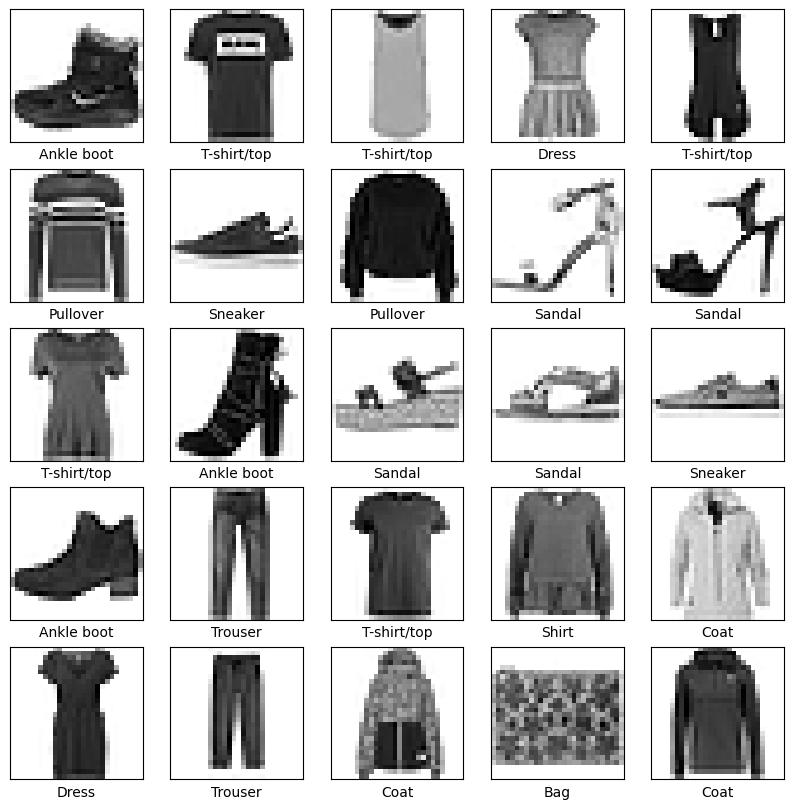

In [ ]:
# Display the first 25 images from the training set and display the class name below each image.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
# Define the neural network model
#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(28, 28)),
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
#])

# another way
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_uniform', kernel_regularizer=keras.regularizers.L2(0.01)))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
# Train the model
network_history_std = model.fit(X_train, Y_train, validation_data=(X_valid,Y_valid),
                                epochs=10000000000, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10000000000


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 4s 2ms/step - loss: 0.8673 - accuracy: 0.7304 - val_loss: 0.6200 - val_accuracy: 0.7888
Epoch 2/10000000000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5693 - accuracy: 0.8060 - val_loss: 0.5309 - val_accuracy: 0.8125
Epoch 3/10000000000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5054 - accuracy: 0.8257 - val_loss: 0.4917 - val_accuracy: 0.8229
Epoch 4/10000000000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4710 - accuracy: 0.8364 - val_loss: 0.4655 - val_accuracy: 0.8354
Epoch 5/10000000000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8429 - val_loss: 0.4477 - val_accuracy: 0.8401
Epoch 6/10000000000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.8491 - val_loss: 0.4358 - val_accuracy: 0.8439
Epoch 7/10000000000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4192 - accuracy

In [ ]:
# Test accuracy of /255: 0.864799976348877
# Test accuracy: 0.875
import copy
network_history_1 = copy.deepcopy(network_history_div)


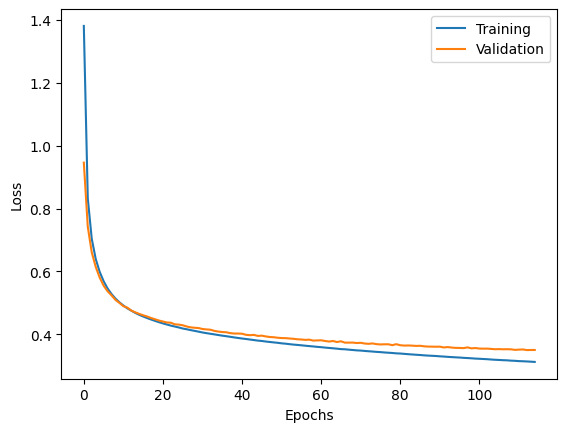

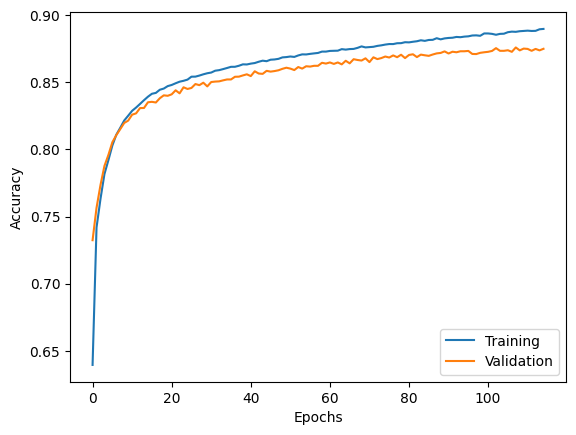

In [ ]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history_div)

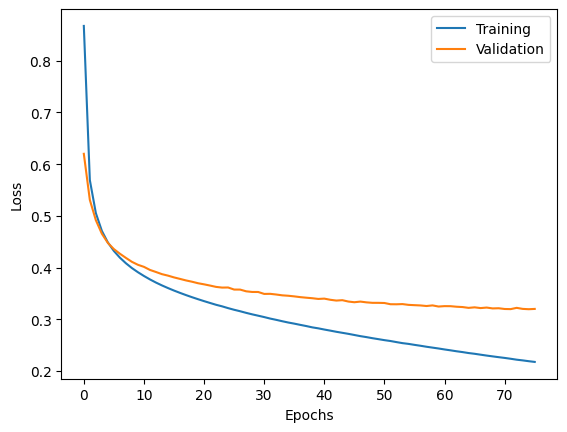

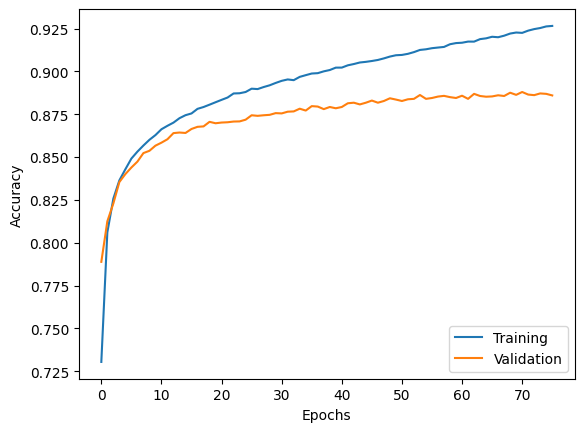

In [ ]:
plot_history(network_history_std)

In [ ]:
print("Hello Balint")

Hello Balint


In [ ]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu121/torch-2.1.0%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=0d4e8c52a1fcf5ed6cfc256d9a370fcf4360958fc79d0b08a51d55e70914df46
torchaudio @ https://download.pytorch.org/whl/cu121/torchaudio-2.1.0%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=676bda4042734eda99bc59b2d7f761f345d3cde0cad492ad34e3aefde688c6d8
torchdata==0.7.0
torchsummary==1.5.1
torchtext==0.16.0
torchvision @ https://download.pytorch.org/whl/cu121/torchvision-0.16.0%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=e76e78d0ad43636c9884b3084ffaea8a8b61f21129fbfa456a5fe734f0affea9


# Backprop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def activation(x): # sigmoid
  return 1/(1+np.exp(-x))

def dactivation(x): # derivative of sigmoid
  return np.exp(-x)/((1+np.exp(-x))**2)

In [ ]:
class MLP:

  def __init__(self, *args):
    np.random.seed(4)
    self.shape           = args # shape of the NN
    n                    = len(args) # number of layers
    self.layers          = [] # the activations of the layers (denoted by "a")

    self.layers.append(np.ones(self.shape[0]+1))
    for i in range(1,n):
      self.layers.append(np.ones(self.shape[i]))

    # define the weights
    self.weights = []
    for i in range(n-1):
      self.weights.append(np.zeros((self.layers[i].size,
                                    self.layers[i+1].size)))

    # self.dw = ...
    self.reset()

  def reset(self):
    for i in range(len(self.weights)):
      Z = np.random.random((self.layers[i].size,
                            self.layers[i+1].size)) # [0,1)
      self.weights[i] = (2*Z-1)/np.sqrt(self.layers[i].size)


  def propagate_forward(self, data):
    self.layers[0][0:-1] = data
    for i in range(1, len(self.shape)):
      self.layers[i] = activation(np.dot(self.layers[i-1],
                                        self.weights[i-1])) # a^(i-1)*W^(i-1)
    return self.layers[-1]


  def propagate_backward(self, target, lrate=0.1):
    deltas = []
    error = -(target-self.layers[-1])
    # backprop from output
    delta = error*dactivation(np.dot(self.layers[-2],self.weights[-1])) # f'(s(3))
    deltas.append(delta)
    for i in range(len(self.shape)-2,0,-1):
      delta = np.dot(delta[0], self.weights[i].T)*\
              dactivation(np.dot(self.layers[i-1],self.weights[i-1]))
      deltas.insert(0,delta)

    for i in range(len(self.weights)):
      layer = np.atleast_2d(self.layers[i])
      delta = np.atleast_2d(deltas[i])
      dw    = -lrate*np.dot(layer.T, delta)
      self.weights[i] += dw

    return (error**2).sum()

In [ ]:
model = MLP(2,3,1)

In [ ]:
Z=np.random.random((3,3))
print(Z*2-1)

[[ 0.72598647  0.96680135 -0.67231552]
 [ 0.19466789 -0.9820278  -0.22685743]
 [-0.91167988  0.91330594 -0.12770671]]


In [ ]:
def learn(model, X, Y, valid_split, test_split, epochs=50, lrate=0.1, momentum=0.9, patience=10):
        # Train-validation-test split
        v_split = int(nb_samples*(1-valid_split-test_split))
        t_split = int(nb_samples*(1-test_split))
        X_train = X[0:v_split]
        Y_train = Y[0:v_split]
        X_valid = X[v_split:t_split]
        Y_valid = Y[v_split:t_split]
        X_test  = X[t_split:]
        Y_test  = Y[t_split:]

        # Standardize
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)

        # Shuffling input training data
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]

        # Training loop for epochs times
        for i in range(epochs):
            # Training phase - sample by sample
            train_err = 0
            for k in range(X_train.shape[0]):
                model.propagate_forward( X_train[k] )
                train_err += model.propagate_backward( Y_train[k], lrate )
            train_err /= X_train.shape[0]

            # Validation phase
            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                o_valid[k] = model.propagate_forward(X_valid[k])
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i, train_err, valid_err))

        # Test phase
        print("\n--- Testing ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            o_test[k] = model.propagate_forward(X_test[k])
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (groundtruth: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]
        print("test error:",test_err)
        # plotting figure
        fig1=plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.cool)

In [ ]:
import numpy as np
from sklearn import preprocessing
import copy
nb_samples=1000 # number of sample points
X = np.zeros((nb_samples,2)) # two-dimensional input (X1 and X2 coordinates of the points)
Y = np.zeros(nb_samples) # output ('class': 0 or 1)
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    X[i], Y[i] = (-2+noise[0],-2+noise[1]), 0
    X[i+1], Y[i+1] = (2+noise[2],-2+noise[3]), 1
    X[i+2], Y[i+2] = (-2+noise[4],2+noise[5]), 1
    X[i+3], Y[i+3] = (2+noise[6],2+noise[7]), 0

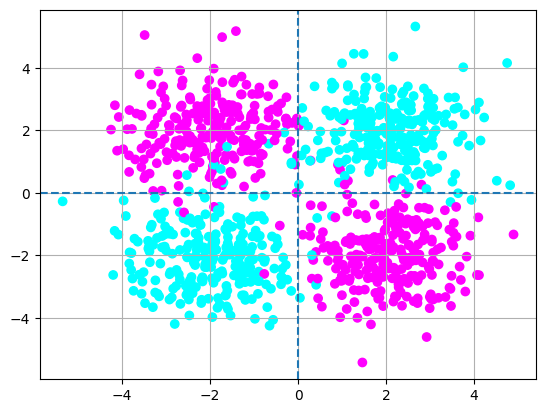

In [ ]:
fig1=plt.figure()
plt.grid(True)
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.cool)

In [ ]:
# creating the neural network
model = MLP(2,10,1)

0 epoch, train_err: 0.2525, valid_err: 0.2501
1 epoch, train_err: 0.2524, valid_err: 0.2500
2 epoch, train_err: 0.2523, valid_err: 0.2500
3 epoch, train_err: 0.2523, valid_err: 0.2500
4 epoch, train_err: 0.2522, valid_err: 0.2499
5 epoch, train_err: 0.2522, valid_err: 0.2499
6 epoch, train_err: 0.2521, valid_err: 0.2499
7 epoch, train_err: 0.2521, valid_err: 0.2499
8 epoch, train_err: 0.2520, valid_err: 0.2498
9 epoch, train_err: 0.2520, valid_err: 0.2498
10 epoch, train_err: 0.2519, valid_err: 0.2497
11 epoch, train_err: 0.2519, valid_err: 0.2497
12 epoch, train_err: 0.2518, valid_err: 0.2496
13 epoch, train_err: 0.2517, valid_err: 0.2495
14 epoch, train_err: 0.2516, valid_err: 0.2494
15 epoch, train_err: 0.2515, valid_err: 0.2493
16 epoch, train_err: 0.2513, valid_err: 0.2491
17 epoch, train_err: 0.2511, valid_err: 0.2487
18 epoch, train_err: 0.2508, valid_err: 0.2482
19 epoch, train_err: 0.2502, valid_err: 0.2474
20 epoch, train_err: 0.2492, valid_err: 0.2459
21 epoch, train_err: 0.

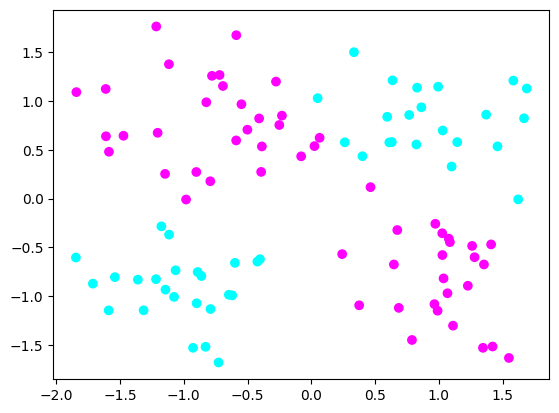

In [ ]:
# Tanítás/Tesztelés indítása
model.reset()
learn(model, X, Y, 0.2, 0.1)

## 2024